 請同學利用台北市道路圖與村界里圖，如果將內湖區的港墘路拓寬，請利用地理資訊計算港墘路、環山路、堤頂大道此區域所影響的區域(影響範圍buffer以及涵蓋面積百分比請同學自行設計)。

In [ ]:
from google.colab import drive    #將雲端硬碟與這台機器掛載在一起
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/pandas_GIS/notebook

/content/drive/MyDrive/pandas_GIS/notebook


In [ ]:
!pip install geopandas
!pip install mapclassify
!pip install pysal==2.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 63.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 52.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pysal: filename=pysal-2.0.0-py3-none-any.whl size=25231760 sha256=08144e98c6ec5dceaaf40b4cc2525f26307c83ccfa11abd3480569651a600ef1
  Stored in directory: /root/.cache/pip/wheels/bf/e6/eb/ea3f9fefd0341438055cf20231166f4fcf979f9777b6f10462
Successfully built pysal


In [ ]:
import geopandas as gpd
%pylab inline
pylab.rcParams['figure.figsize'] = (20.0, 20.0)

Populating the interactive namespace from numpy and matplotlib


專題2

In [ ]:
roads = gpd.read_file('../geodata/Taiwan Road/roads.shp')
roads.crs  #裡面的座標是用全世界的經緯度座標 WSG

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
roads = roads.to_crs(epsg=3826)   #把資料改成TM2座標(把經緯度轉成台灣的TM2)

In [ ]:
roads

,osm_id,name,ref,type,oneway,bridge,tunnel,maxspeed,geometry
0,4860359,重慶北路一段,NaN,secondary,1,0,0,NaN,"LINESTRING (301881.119 2771811.841, 301877.509..."
1,4860738,春日路,1;4;110,primary,1,0,0,NaN,"LINESTRING (281706.886 2765902.984, 281709.781..."
2,4860739,三民路三段,1;4,primary,1,0,0,NaN,"LINESTRING (280888.721 2764967.654, 280893.248..."
3,4860740,三民路,NaN,tertiary,1,0,0,NaN,"LINESTRING (282845.006 2765032.009, 282818.891..."
4,4860741,三民路三段,4,primary,0,0,0,NaN,"LINESTRING (281055.627 2763819.827, 281046.298..."
...,...,...,...,...,...,...,...,...,...
277035,421109079,NaN,NaN,footway,0,0,0,NaN,"LINESTRING (279508.386 2769013.865, 279556.258..."
277036,421109084,NaN,NaN,service,0,0,0,NaN,"LINESTRING (279552.331 2768927.033, 279519.418..."
277037,421109085,NaN,NaN,service,0,0,0,NaN,"LINESTRING (279477.506 2768933.772, 279488.939..."
277038,421109132,NaN,NaN,service,0,0,0,NaN,"LINESTRING (279629.489 2768747.574, 279620.566..."


In [ ]:
villages_shp = gpd.read_file('../geodata/台灣里界圖_TWD97/Village_NLSC_121_1050219.shp')
taipei_shp = villages_shp[villages_shp['C_Name']=='臺北市'] 
taipei_roads = roads[roads.intersects(taipei_shp.unary_union)]

In [ ]:
taipei_roads

,osm_id,name,ref,type,oneway,bridge,tunnel,maxspeed,geometry
0,4860359,重慶北路一段,NaN,secondary,1,0,0,NaN,"LINESTRING (301881.119 2771811.841, 301877.509..."
31,4928571,中山高速公路,1,motorway,1,1,0,100.0,"LINESTRING (312042.368 2773210.320, 311770.088..."
45,4947944,北平西路,NaN,residential,1,0,0,NaN,"LINESTRING (301790.924 2771215.959, 301777.741..."
46,4947947,太原路,NaN,residential,0,0,0,NaN,"LINESTRING (302155.364 2772213.686, 302155.968..."
47,4947948,NaN,NaN,residential,0,0,0,NaN,"LINESTRING (302045.816 2771714.505, 302202.339..."
...,...,...,...,...,...,...,...,...,...
277020,421051635,NaN,NaN,service,0,0,0,NaN,"LINESTRING (301491.516 2773006.473, 301468.677..."
277021,421051636,NaN,NaN,service,0,0,0,NaN,"LINESTRING (301704.265 2773142.314, 301705.080..."
277022,421051637,NaN,NaN,service,0,0,0,NaN,"LINESTRING (301472.315 2773290.109, 301493.210..."
277023,421051638,NaN,NaN,service,0,0,0,NaN,"LINESTRING (301394.821 2773167.363, 301387.570..."


In [ ]:
len(taipei_roads)

25266

In [ ]:
港墘路 = taipei_roads[taipei_roads['name'].str.contains('港墘')==True]   #contains('str') 若有這個字就是True
環山路 = taipei_roads[taipei_roads['name'].str.contains('環山')==True]
堤頂大道 = taipei_roads[taipei_roads['name'].str.contains('堤頂')==True]

In [ ]:
taipei_roads[taipei_roads['name'].str.match(r'^環山.+一段')==True]   #正規表達法   ^:以重慶做開頭 .:代表任意字元 +:可以選1~無限多個字 (以重慶開頭 後面隨便 最後接一段)的路都找出來

,osm_id,name,ref,type,oneway,bridge,tunnel,maxspeed,geometry
865,23766390,環山路一段,NaN,tertiary,0,0,0,NaN,"LINESTRING (307046.808 2775026.796, 307046.014..."
10110,62080909,環山路一段136巷,NaN,residential,0,0,0,NaN,"LINESTRING (307292.600 2775712.265, 307327.161..."
10111,62080910,環山路一段24巷,NaN,residential,0,0,0,NaN,"LINESTRING (306843.762 2775256.634, 307045.297..."
10128,62080929,環山路一段59巷,NaN,residential,0,0,0,NaN,"LINESTRING (307300.835 2775468.975, 307301.178..."
10132,62080933,環山路一段60巷,NaN,residential,0,0,0,NaN,"LINESTRING (307154.018 2775498.864, 307154.213..."
10133,62080934,環山路一段60巷,NaN,residential,0,0,0,NaN,"LINESTRING (307154.780 2775536.240, 307154.199..."
51356,172359399,環山路一段9巷,NaN,unclassified,0,0,0,NaN,"LINESTRING (307187.106 2775089.791, 307126.443..."
196853,330466876,環山路一段28巷,NaN,residential,0,0,0,NaN,"LINESTRING (306869.331 2775361.262, 307044.621..."
255343,395249279,環山路一段59巷14弄,NaN,footway,0,0,0,NaN,"LINESTRING (307397.153 2775444.213, 307400.282..."


<Axes: >

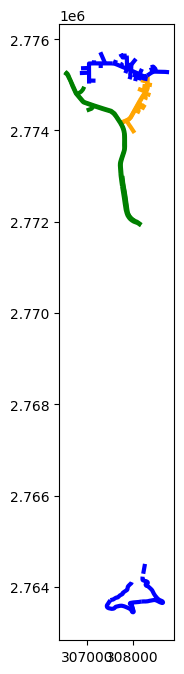

In [ ]:
ax = 港墘路.plot(linewidth=3, color="Orange",figsize=(8,8))
環山路.plot(linewidth=3, ax=ax, color="Blue")
堤頂大道.plot(linewidth=3, ax=ax,  color="Green")

In [ ]:
堤頂大道

,osm_id,name,ref,type,oneway,bridge,tunnel,maxspeed,geometry
2170,26790156,堤頂大道二段,NaN,secondary,1,0,0,NaN,"LINESTRING (307747.962 2774153.812, 307744.195..."
5502,48769273,堤頂大道一段,NaN,secondary,1,0,0,NaN,"LINESTRING (307726.815 2774163.825, 307731.319..."
10108,62080907,堤頂大道二段470巷,NaN,residential,0,0,0,NaN,"LINESTRING (306775.099 2774805.288, 306785.639..."
44127,158807855,堤頂大道二段,NaN,secondary,1,0,0,NaN,"LINESTRING (306509.193 2775269.820, 306566.602..."
44589,159118950,堤頂大道一段,NaN,secondary,1,0,0,NaN,"LINESTRING (308192.152 2771930.784, 308168.530..."
45569,160307897,堤頂大道一段,NaN,residential,1,0,0,NaN,"LINESTRING (308042.378 2772020.234, 308024.130..."
109873,244421762,堤頂大道二段,NaN,secondary,1,0,0,NaN,"LINESTRING (306930.835 2774624.288, 306775.099..."
109874,244421763,堤頂大道二段,NaN,secondary,1,0,0,NaN,"LINESTRING (306775.099 2774805.288, 306763.773..."
109875,244421764,堤頂大道二段,NaN,secondary,1,0,0,NaN,"LINESTRING (306692.600 2774977.588, 306612.539..."
190714,324294395,堤頂大道一段,NaN,secondary,1,0,0,NaN,"LINESTRING (307769.160 2772780.994, 307800.907..."


找到忠孝橋引道

In [ ]:
港墘路xint = 港墘路.unary_union.intersection(環山路.unary_union).centroid    
    
港墘路yint = 港墘路.unary_union.intersection(堤頂大道.unary_union).centroid

In [ ]:
港墘路xint.x , 港墘路xint.y

(308321.81247583573, 2775149.6680797036)

In [ ]:
港墘路yint.x, 港墘路yint.y

(307735.39968786004, 2774162.7451830925)

In [ ]:
港墘路_x = 港墘路.geometry.centroid.apply(lambda t: t.x)   #線段的中心點，如果有在區域裡面，才考慮

港墘路_x

860       308085.186263
2154      307953.855955
2171      308206.262189
2188      308188.897306
2189      308108.134897
2192      308374.909045
44111     308245.489119
102350    308329.650421
108062    308130.189811
108073    308255.449110
108074    308295.431339
108075    308283.371572
108076    308289.545588
108123    308251.556283
108129    308292.608813
109374    308311.489353
109375    308271.613139
174465    308077.683833
174466    308172.652534
190720    307877.269825
203784    308184.738807
261949    308204.408610
261950    307882.094899
272362    308189.154295
dtype: float64

In [ ]:
港墘路拓寬 = 港墘路[(港墘路_x < 港墘路xint.x)&(港墘路yint.x < 港墘路_x)]   #利用座標表示道路所介於的位置

In [ ]:
港墘路拓寬

,osm_id,name,ref,type,oneway,bridge,tunnel,maxspeed,geometry
860,23759709,港墘路,NaN,tertiary,1,0,0,NaN,"LINESTRING (308001.085 2774356.685, 308053.723..."
2154,26787033,港墘路221巷,NaN,residential,0,0,0,NaN,"LINESTRING (307868.232 2774214.181, 307921.961..."
2171,26790620,港墘路82巷,NaN,residential,0,0,0,NaN,"LINESTRING (308293.262 2774845.124, 308284.178..."
2188,26793886,港墘路127巷,NaN,residential,0,0,0,NaN,"LINESTRING (308265.921 2774479.803, 308222.020..."
2189,26793943,港墘路122巷,NaN,residential,0,0,0,NaN,"LINESTRING (308162.784 2774393.550, 308101.204..."
44111,158804765,港墘路127巷16弄,NaN,residential,0,0,0,NaN,"LINESTRING (308268.958 2774567.035, 308222.020..."
108062,242316095,港墘路127巷,NaN,residential,0,0,0,NaN,"LINESTRING (308161.856 2774528.429, 308129.584..."
108073,242343466,港墘路82巷7弄,NaN,residential,0,0,0,NaN,"LINESTRING (308266.284 2775015.615, 308263.673..."
108074,242343488,港墘路60巷,NaN,residential,0,0,0,NaN,"LINESTRING (308304.867 2775009.322, 308305.031..."
108075,242343498,港墘路42巷10弄,NaN,residential,0,0,0,NaN,"LINESTRING (308262.004 2774978.500, 308304.739..."


In [ ]:
港墘路拓寬 = 港墘路拓寬[港墘路拓寬['type'] != 'service']

<Axes: >

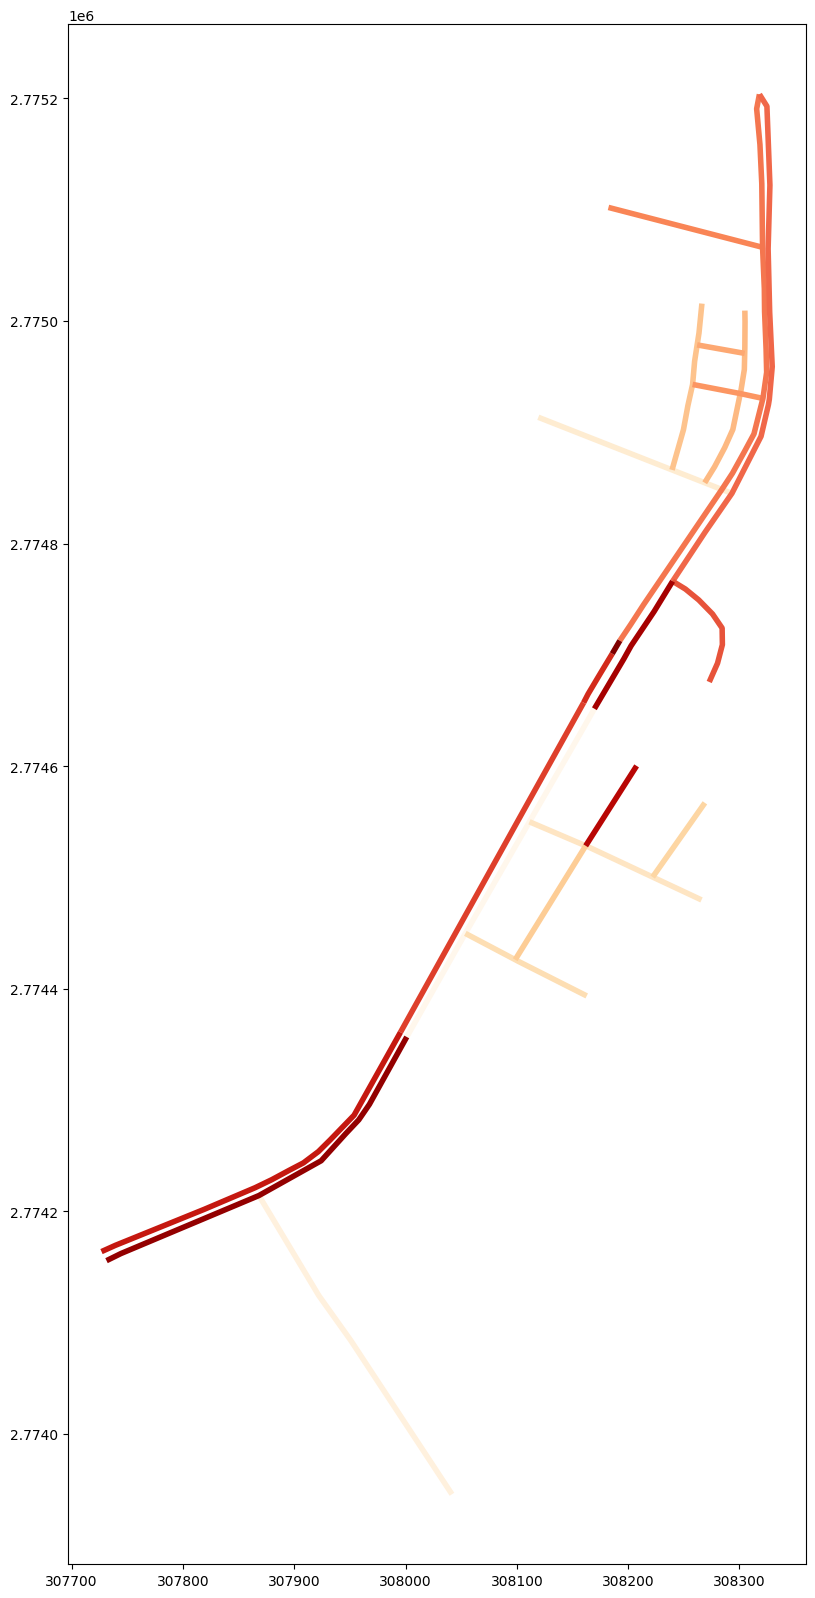

In [ ]:
港墘路拓寬.plot(linewidth=4,cmap='OrRd')    #會影響的道路

<Axes: >

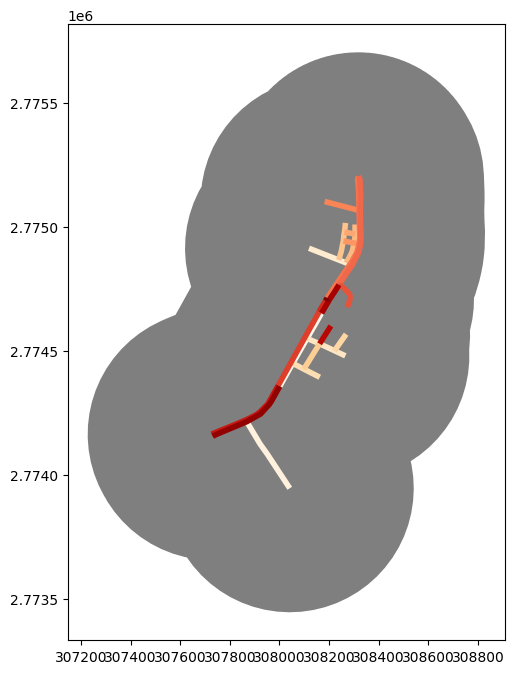

In [ ]:
港墘路拓寬buffer = \
  gpd.GeoSeries(港墘路拓寬.unary_union.buffer(500))    #以每一個線段的點為中心去畫圓，所形成的緩衝區(buffer) 半徑為500
ax = 港墘路拓寬buffer.plot(cmap='gray',alpha=0.5,figsize=(8,8))
港墘路拓寬.plot(ax=ax, linewidth=4,cmap='OrRd')

In [ ]:
港墘路拓寬buffer

0    POLYGON ((307281.399 2773937.981, 307270.968 2...
dtype: geometry

In [ ]:
#找到被影響的鄰里
influences_villages_shp =villages_shp[villages_shp.intersects(港墘路拓寬buffer.unary_union)==True]  #將buffer與界里圖重疊的地方抓出來

In [ ]:
influences_villages_shp.groupby("T_Name").size()

T_Name
中山區     1
內湖區    10
松山區     1
dtype: int64

<Axes: >

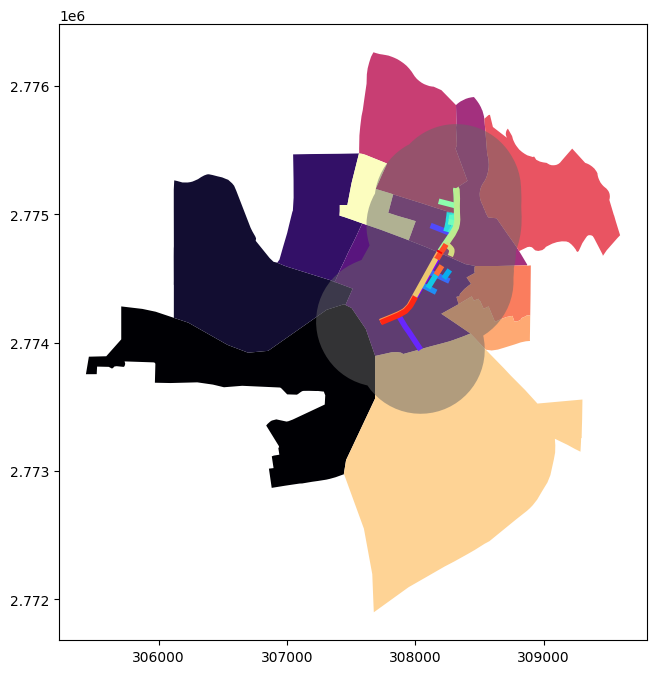

In [ ]:
ax = influences_villages_shp.plot(cmap='magma',figsize=(8,8))
港墘路拓寬buffer.plot(ax=ax,cmap='Dark2_r',alpha=0.5)
港墘路拓寬.plot(ax=ax, linewidth=4,cmap='rainbow')

In [ ]:
len(influences_villages_shp)

12

In [ ]:
influences_villages_shp_clip = \
    influences_villages_shp.copy()
    
influences_villages_shp_clip['geometry'] = \
    influences_villages_shp_clip.intersection(港墘路拓寬buffer.unary_union)
    

In [ ]:
influences_villages_shp_clip

,OBJECTID,UID,PRO_ID,COUNTY_ID,TOWN_ID,VILLAGE_ID,V_Name,T_Name,C_Name,Substitute,geometry
2195,4736,6192,63,63,6300100,6300100-002,莊敬里,松山區,臺北市,莊敬里,"POLYGON ((307503.712 2774270.211, 307614.454 2..."
2341,4883,6359,63,63,6300400,6300400-041,金泰里,中山區,臺北市,金泰里,"POLYGON ((307345.197 2774484.644, 307352.896 2..."
2498,5040,6516,63,63,6301000,6301000-001,西湖里,內湖區,臺北市,西湖里,"POLYGON ((307379.337 2774488.233, 307370.055 2..."
2501,5043,6519,63,63,6301000,6301000-005,港墘里,內湖區,臺北市,港墘里,"POLYGON ((307855.068 2774833.833, 307916.017 2..."
2502,5044,6520,63,63,6301000,6301000-006,港都里,內湖區,臺北市,港都里,"POLYGON ((308329.198 2775001.170, 308329.947 2..."
2503,5045,6521,63,63,6301000,6301000-007,港富里,內湖區,臺北市,港富里,"POLYGON ((308551.364 2775588.080, 308560.743 2..."
2504,5046,6522,63,63,6301000,6301000-008,港華里,內湖區,臺北市,港華里,"POLYGON ((308319.982 2775703.293, 308318.835 2..."
2506,5048,6524,63,63,6301000,6301000-010,湖濱里,內湖區,臺北市,湖濱里,"POLYGON ((308789.839 2774745.142, 308748.245 2..."
2516,5058,6534,63,63,6301000,6301000-020,瑞陽里,內湖區,臺北市,瑞陽里,"POLYGON ((308668.691 2774183.643, 308629.658 2..."
2517,5059,6535,63,63,6301000,6301000-021,瑞光里,內湖區,臺北市,瑞光里,"POLYGON ((308523.029 2773973.262, 308503.252 2..."


<Axes: >

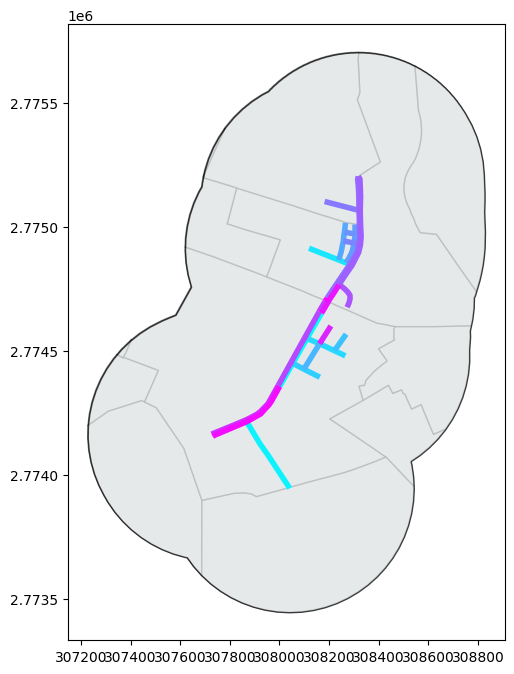

In [ ]:
ax = influences_villages_shp_clip.plot(color='gray',alpha=0.5 ,edgecolor='black',figsize=(8,8))
港墘路拓寬buffer.plot(ax=ax,cmap='BuPu',alpha=0.7,edgecolor='black')
港墘路拓寬.plot(ax=ax, linewidth=4,cmap='cool')

In [ ]:
influences_villages_shp

,OBJECTID,UID,PRO_ID,COUNTY_ID,TOWN_ID,VILLAGE_ID,V_Name,T_Name,C_Name,Substitute,geometry
2195,4736,6192,63,63,6300100,6300100-002,莊敬里,松山區,臺北市,莊敬里,"POLYGON ((307456.117 2774293.770, 307503.712 2..."
2341,4883,6359,63,63,6300400,6300400-041,金泰里,中山區,臺北市,金泰里,"POLYGON ((306924.342 2774623.611, 306943.860 2..."
2498,5040,6516,63,63,6301000,6301000-001,西湖里,內湖區,臺北市,西湖里,"POLYGON ((307561.255 2775474.558, 307525.631 2..."
2501,5043,6519,63,63,6301000,6301000-005,港墘里,內湖區,臺北市,港墘里,"POLYGON ((307818.003 2774847.701, 307855.068 2..."
2502,5044,6520,63,63,6301000,6301000-006,港都里,內湖區,臺北市,港都里,"POLYGON ((308329.110 2775007.174, 308329.198 2..."
2503,5045,6521,63,63,6301000,6301000-007,港富里,內湖區,臺北市,港富里,"POLYGON ((308537.985 2775744.648, 308541.054 2..."
2504,5046,6522,63,63,6301000,6301000-008,港華里,內湖區,臺北市,港華里,"POLYGON ((308317.258 2775851.829, 308320.378 2..."
2506,5048,6524,63,63,6301000,6301000-010,湖濱里,內湖區,臺北市,湖濱里,"POLYGON ((309378.028 2775372.794, 309396.050 2..."
2516,5058,6534,63,63,6301000,6301000-020,瑞陽里,內湖區,臺北市,瑞陽里,"POLYGON ((308895.946 2774212.286, 308869.762 2..."
2517,5059,6535,63,63,6301000,6301000-021,瑞光里,內湖區,臺北市,瑞光里,"POLYGON ((308895.946 2774212.286, 308893.204 2..."


<Axes: >

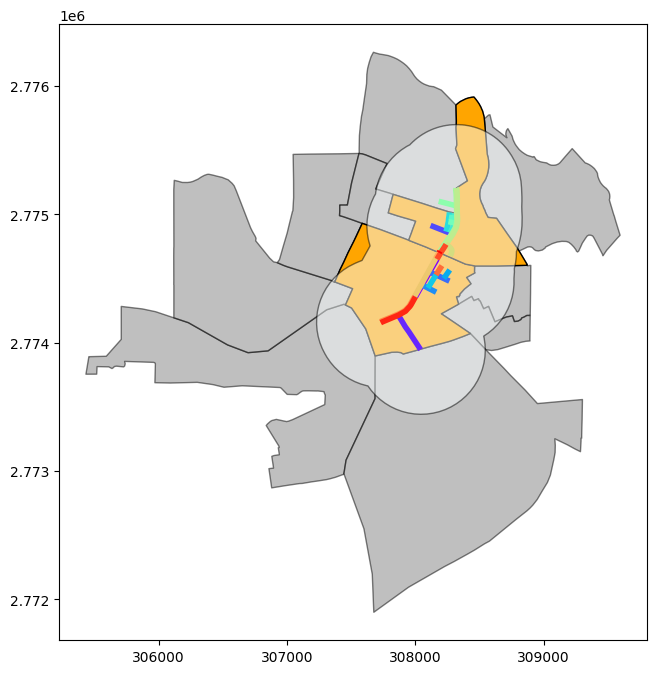

In [ ]:
ax = influences_villages_shp.plot(color='gray',alpha=0.5 ,edgecolor='black',figsize=(8,8))

influences_villages_shp[(influences_villages_shp_clip['geometry'].area / influences_villages_shp['geometry'].area)> 0.8].plot(ax=ax,color='Orange',edgecolor='black')
                                         #用.area將影響(重疊)的範圍 > 0.8 顯示出來
港墘路拓寬buffer.plot(ax=ax,cmap='BuPu',alpha=0.5,edgecolor='black')
港墘路拓寬.plot(ax=ax, linewidth=4,cmap='rainbow')

In [ ]:
za=influences_villages_shp[['C_Name','Substitute','geometry']]
za.head()

,C_Name,Substitute,geometry
2195,臺北市,莊敬里,"POLYGON ((307456.117 2774293.770, 307503.712 2..."
2341,臺北市,金泰里,"POLYGON ((306924.342 2774623.611, 306943.860 2..."
2498,臺北市,西湖里,"POLYGON ((307561.255 2775474.558, 307525.631 2..."
2501,臺北市,港墘里,"POLYGON ((307818.003 2774847.701, 307855.068 2..."
2502,臺北市,港都里,"POLYGON ((308329.110 2775007.174, 308329.198 2..."
